In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=  pd.read_csv('Voice_Sources.csv', index_col=0)

In [3]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,106.196970,81.568782,100.0,20.0,190.0,170.0,0.243448,-1.368536,10.0,270.0,20100710,1028,Adult,American,M
1,93.255452,91.364379,50.0,20.0,200.0,180.0,0.734991,-1.222807,50.0,270.0,20170321,1337ad,Adult,Unknown,F
2,105.632959,92.503697,50.0,20.0,200.0,180.0,0.451782,-1.562513,50.0,270.0,20170321,1337ad,Adult,Unknown,F
3,95.298329,93.067498,50.0,20.0,200.0,180.0,0.638751,-1.391880,10.0,270.0,20170321,1337ad,Unknown,Unknown,Unknown
4,46.953846,62.705277,20.0,20.0,20.0,0.0,1.935404,2.122227,20.0,250.0,20120412,1snoke,Adult,American,M


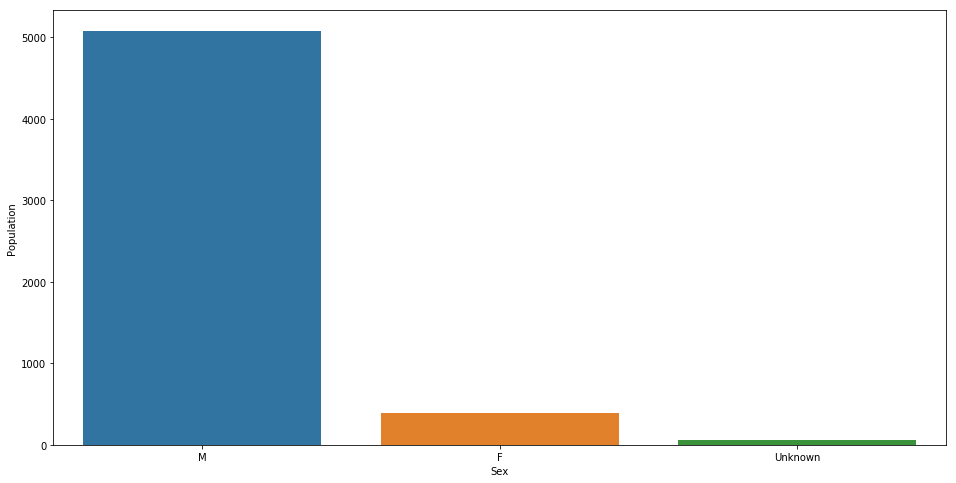

In [4]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Population')
plt.show()

The above plot shows that the dataset is imbalanced with respect to number of voices of Male and Female speakers
While in real world this is a balanced problem since the number of male and females in the worls are almost equal (50.4 % male for each 49.6 female ; Source: https://countrymeters.info/en/World)

In [5]:
df_sex_unknown = df[df.sex == 'Unknown']

In [6]:
df_sex_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 3 to 5299
Data columns (total 15 columns):
mean         63 non-null float64
std          63 non-null float64
median       63 non-null float64
first_q      63 non-null float64
third_q      63 non-null float64
inter_q      63 non-null float64
skewness     63 non-null float64
kurtosis     63 non-null float64
mode         63 non-null float64
peak         63 non-null float64
date         63 non-null int64
user         63 non-null object
age          63 non-null object
pronounce    63 non-null object
sex          63 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 7.9+ KB


## df_sex_unknown is about 1% of the whole data, I will put that aside for the moment, and at the end of project will try to predict and check if my ML can help to tag them correctly with respect to the sex as a double check of accuracy!

In [7]:
df = df[df.sex != 'Unknown']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 0 to 6244
Data columns (total 15 columns):
mean         5474 non-null float64
std          5474 non-null float64
median       5474 non-null float64
first_q      5474 non-null float64
third_q      5474 non-null float64
inter_q      5474 non-null float64
skewness     5474 non-null float64
kurtosis     5474 non-null float64
mode         5474 non-null float64
peak         5474 non-null float64
date         5474 non-null int64
user         5474 non-null object
age          5474 non-null object
pronounce    5474 non-null object
sex          5474 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 684.2+ KB


In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 0 to 6244
Data columns (total 15 columns):
mean         5472 non-null float64
std          5472 non-null float64
median       5472 non-null float64
first_q      5472 non-null float64
third_q      5472 non-null float64
inter_q      5472 non-null float64
skewness     5472 non-null float64
kurtosis     5472 non-null float64
mode         5472 non-null float64
peak         5472 non-null float64
date         5472 non-null int64
user         5472 non-null object
age          5472 non-null object
pronounce    5472 non-null object
sex          5472 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 684.0+ KB


In [11]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,106.196970,81.568782,100.0,20.0,190.0,170.0,0.243448,-1.368536,10.0,270.0,20100710,1028,Adult,American,M
1,93.255452,91.364379,50.0,20.0,200.0,180.0,0.734991,-1.222807,50.0,270.0,20170321,1337ad,Adult,Unknown,F
2,105.632959,92.503697,50.0,20.0,200.0,180.0,0.451782,-1.562513,50.0,270.0,20170321,1337ad,Adult,Unknown,F
4,46.953846,62.705277,20.0,20.0,20.0,0.0,1.935404,2.122227,20.0,250.0,20120412,1snoke,Adult,American,M
5,138.525207,78.325413,120.0,80.0,210.0,130.0,0.287636,-1.141163,100.0,270.0,20100807,23yipikaye,Adult,Unknown,M


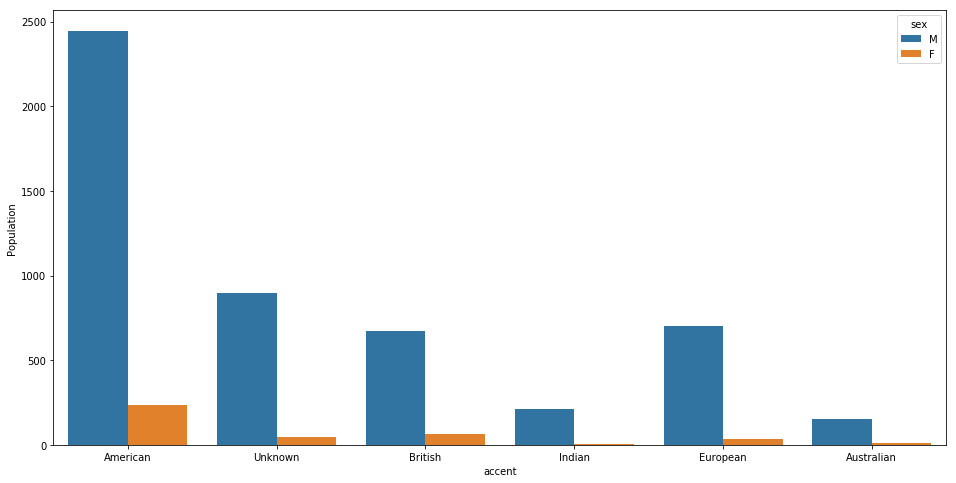

In [12]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='pronounce', data=df, hue = df.sex)
plt.xlabel('accent')
plt.ylabel('Population')
plt.show()

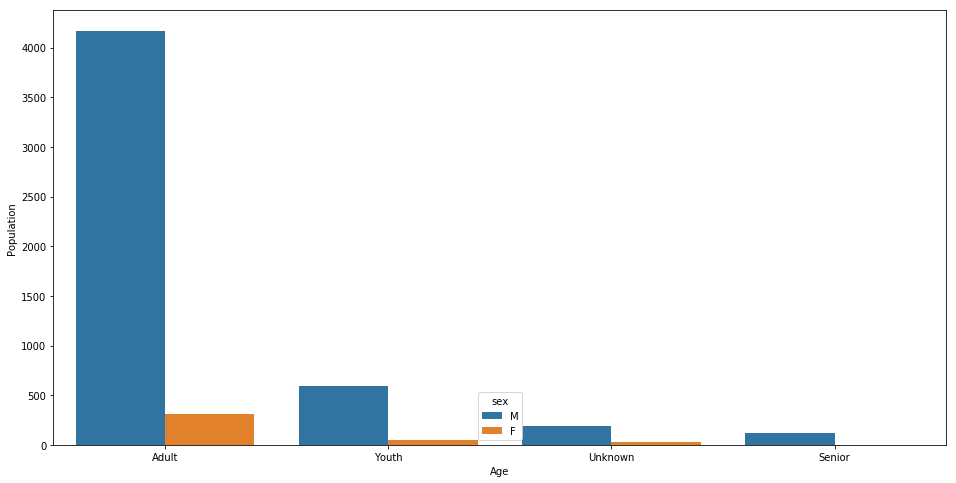

In [13]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='age', data=df, hue = df.sex)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

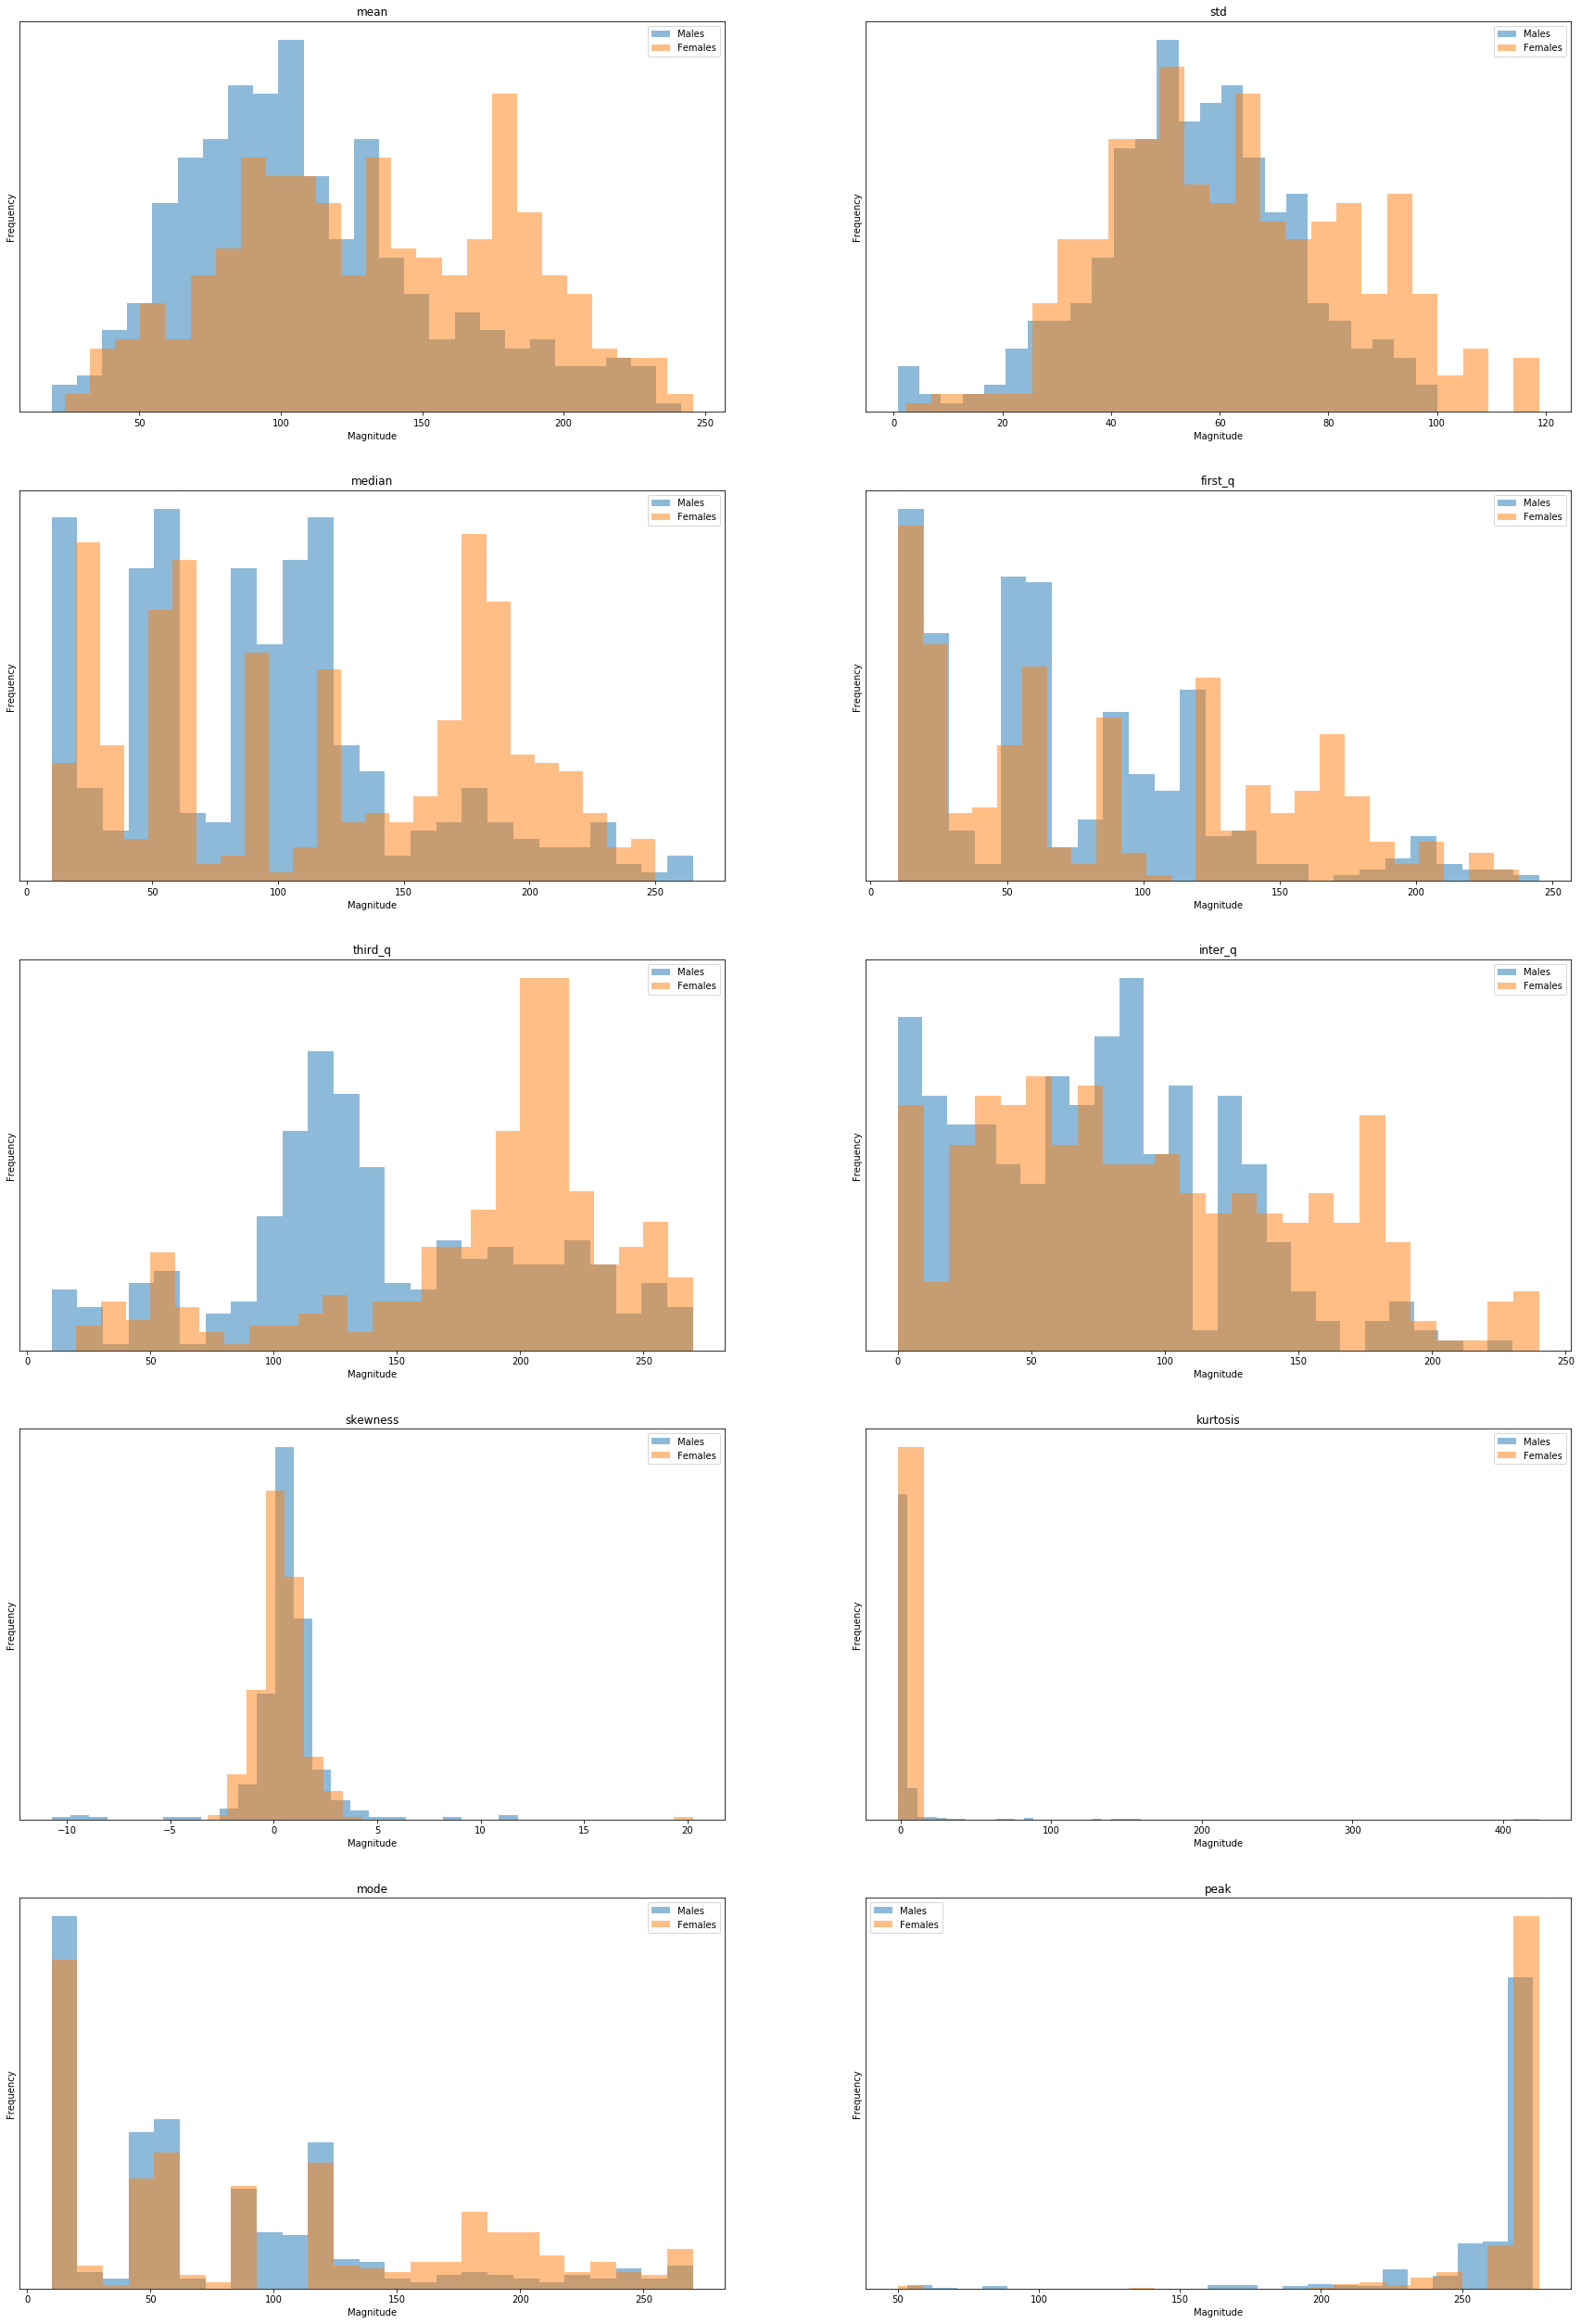

In [14]:
females = df.loc[df.sex=='F']
males = df.loc[df.sex=='M']
males_under_sample = males.sample(len(females))
parameters = ['mean','std','median','first_q', 'third_q', 'inter_q', 'skewness', 'kurtosis','mode','peak']

#Plot the histograms
fig, axes = plt.subplots(5, 2, figsize=(30,45))

ax = axes.flatten()

for i in range(len(parameters)):
    ax[i].hist(males_under_sample.loc[:,parameters[i]], bins=25, alpha =0.5)
    ax[i].hist(females.loc[:, parameters[i]], bins=25, alpha =0.5)
    ax[i].set_title(parameters[i])
    ax[i].set_yticks(())
    
    ax[i].set_xlabel("Magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["Males", "Females"])
plt.show()

## First to Encode 'sex' column to 0 for Male and 1 for Females

In [16]:
df.loc[:,'sex'][df['sex']== 'M'] = 0
df.loc[:,'sex'][df['sex']=='F'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,106.196970,81.568782,100.0,20.0,190.0,170.0,0.243448,-1.368536,10.0,270.0,20100710,1028,Adult,American,0
1,93.255452,91.364379,50.0,20.0,200.0,180.0,0.734991,-1.222807,50.0,270.0,20170321,1337ad,Adult,Unknown,1
2,105.632959,92.503697,50.0,20.0,200.0,180.0,0.451782,-1.562513,50.0,270.0,20170321,1337ad,Adult,Unknown,1
4,46.953846,62.705277,20.0,20.0,20.0,0.0,1.935404,2.122227,20.0,250.0,20120412,1snoke,Adult,American,0
5,138.525207,78.325413,120.0,80.0,210.0,130.0,0.287636,-1.141163,100.0,270.0,20100807,23yipikaye,Adult,Unknown,0


In [21]:
df.to_csv('Voices_Cleaned.csv')
df_sex_unknown.to_csv('Voices_Unknown.csv')